In [2]:
import cv2
import os
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip(),
    layers.RandomRotation(0.99, fill_mode = 'constant'),
  ]
)

In [6]:
rootSourcePath = "C:/Users/ironj/Rock Art/Data"
######################################
sourceFolder = "/PetroImages_v1"
######################################
sourcePath = rootSourcePath + sourceFolder
print("Source Path: ",sourcePath)

rootTargetPath = "C:/Users/ironj/Rock Art/Data"
######################################
targetFolder = "/PetroImages_Augmentedx3"
######################################
targetPath = rootTargetPath + targetFolder
print("Target Path: ",targetPath)

if not os.path.exists(targetPath):
    os.makedirs(targetPath)
    print("Directorio creado: ", targetPath)
else:
    print("Directorio ya había sido creado: ", targetPath)

Source Path:  C:/Users/ironj/Rock Art/Data/PetroImages_v1
Target Path:  C:/Users/ironj/Rock Art/Data/PetroImages_Augmentedx3
Directorio creado:  C:/Users/ironj/Rock Art/Data/PetroImages_Augmentedx3


In [7]:
def dataAugmenting(sourcePath, targetPath, augmentationRate):
    maxFigures = 0
    folders = os.listdir(sourcePath)
    folders.sort()

    for folder in folders:
        group_path = sourcePath + "/" + folder
        files_names = os.listdir(group_path)
        files = len(files_names)
        if maxFigures < files:
            maxFigures = files

    maxFigures = maxFigures * augmentationRate

    for folder in folders:
        group_path = sourcePath + "/" + folder
        files_names = os.listdir(group_path)
        files_names.sort()
        files = len(files_names)
        files = int(maxFigures / files)
        for file_name in files_names:
            img_path = group_path + "/" + file_name
            imagecopy = cv2.imread(img_path)
            file_name = file_name[:-4]
            targetFolder = targetPath + "/" + folder
            if not os.path.exists(targetFolder):
                os.makedirs(targetFolder)
            original = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            cv2.imwrite(targetFolder + "/" + file_name + "_O0000" + ".png", original)

            for i in range(files):
                imageAugmented = data_augmentation(imagecopy)
                copyimageAugmented = imageAugmented[:,:,0] #Se aplana
                match len(str(i)):
                    case 1:
                        zeros = "000"
                    case 2:
                        zeros = "00"
                    case 3:
                        zeros = "0"
                    case _:
                        zeros = ""
                cv2.imwrite(targetFolder + "/" + file_name + "_A" + zeros + str(i) + ".png", copyimageAugmented.numpy() )

In [8]:
dataAugmenting(sourcePath, targetPath, 3)

In [1]:
#stats 
#Cargar librerias
import tensorflow as tf
import numpy as np
import datetime

import tensorflow_hub as hub

print(tf.__version__)
import time

import PIL.Image as Image
import matplotlib.pylab as plt
import os
import shutil
import random

2.10.0


In [2]:
# Ruta de la carpeta principal que contiene las subcarpetas de clases
folder_path = "Data/PetroImages_v1"

In [3]:
#Preparar dataset
# Proporción de datos para el conjunto de validación (porcentaje)
# Lista de las subcarpetas/clases
class_folders = os.listdir(folder_path)

#Dividir dataset para entrenamiento y validación  
BATCH_SIZE = 64
IMG_SIZE = (224, 224)
            
ds = tf.keras.utils.image_dataset_from_directory(folder_path,shuffle=True,seed = 123,batch_size=64,   image_size=IMG_SIZE)

Found 1735 files belonging to 106 classes.


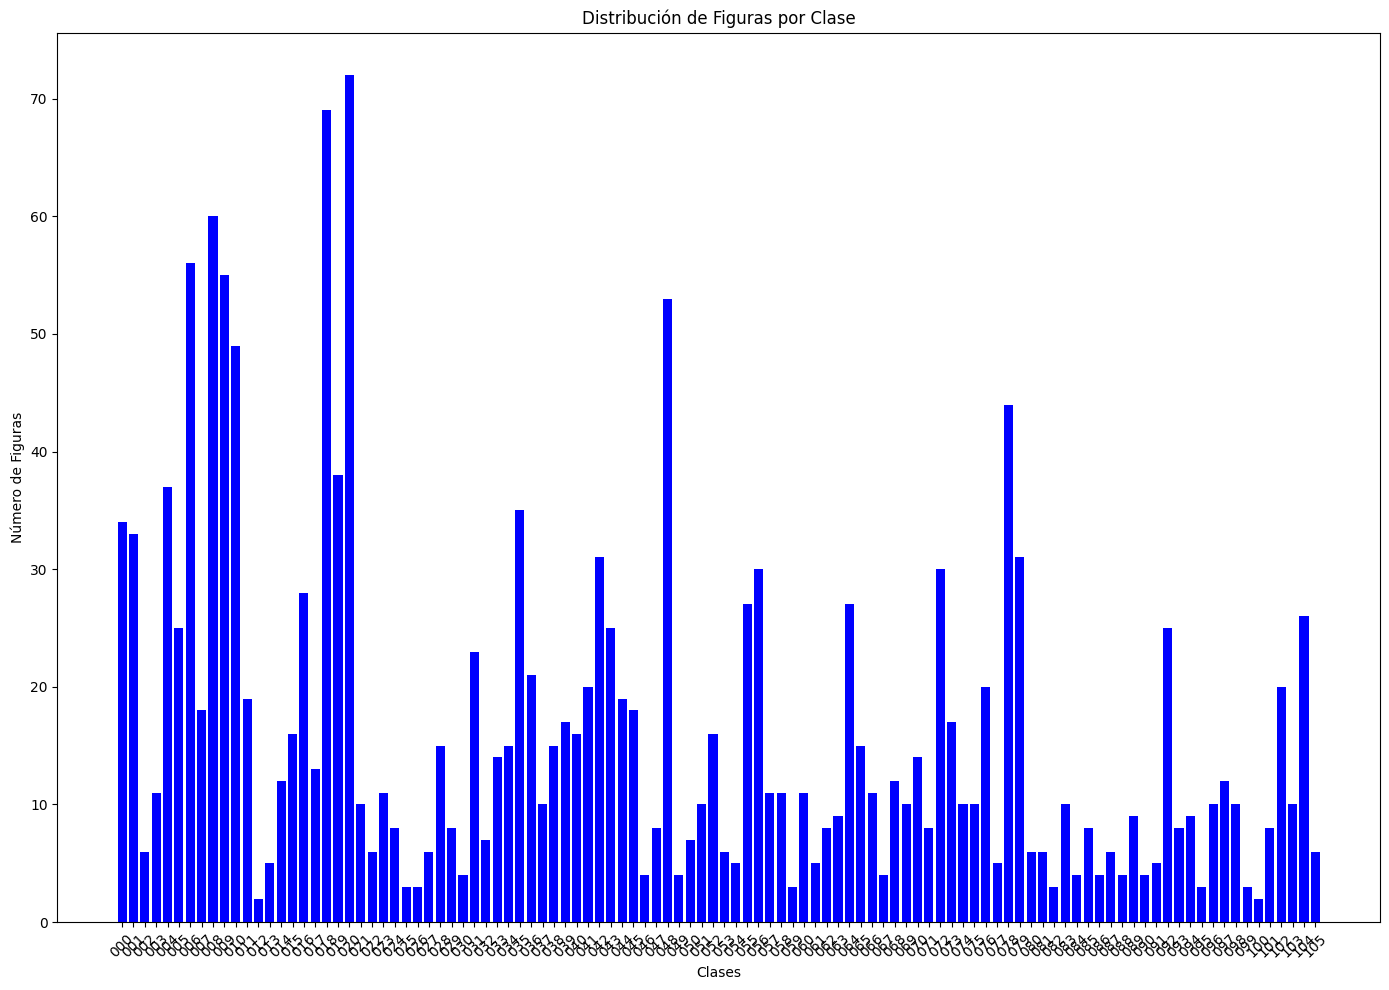

In [4]:

# Lista de nombres de las clases
class_names = np.array(ds.class_names)

# Ruta de la carpeta principal
folder_path = folder_path

# Listas para almacenar los nombres de las clases y la cantidad de elementos
class_names_list = []
element_count_list = []

# Itera a través de cada clase
for class_name in class_names:
    class_folder = os.path.join(folder_path, class_name)
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # Obtiene la lista de elementos en la carpeta de la clase
        elements = os.listdir(class_folder)
        element_count = len(elements)
        class_names_list.append(class_name)
        element_count_list.append(element_count)

# Crea un gráfico de barras
plt.figure(figsize=(14, 10))
plt.bar(class_names_list, element_count_list, color='blue')
plt.xlabel('Clases')
plt.ylabel('Número de Figuras')
plt.title('Distribución de Figuras por Clase')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Muestra el gráfico
plt.tight_layout()
plt.show()